[Extreme value theory](https://en.wikipedia.org/wiki/Extreme_value_theory) is a part of statistics used to model extreme event. In this post, I would like to write a short introduction to it and how it can be used in the real world to predict flood heights, earthquakes, storm waves and so on.

# A motivating example

Let's suppose that you're watching a buoy and measuring its height at given time intervals. This gives you a distribution of wave heights. For our purpose, we just assume that the heights are samples from a Gaussian distribution:

In [3]:
import numpy as np

def generate_wave_sample(N):
    "Generates a sample of N wave heights from a Gaussian distribution."
    return np.random.normal(size=N)

Let's check a sample output:

In [6]:
sample = generate_wave_sample(10)
sample 

array([ 1.08511068,  0.29403097,  0.09479067, -0.41188921, -0.90093405,
        0.81570044, -0.13158337, -1.22136459, -0.0134745 , -1.55378953])

However, as were interested in extremes, we just want to keep one value from our sample: the maximum.

In [7]:
sample.max()

1.0851106797257857

The question now is: if we make several measurements, how will this maximum vary? Let's simulate many measurements and plot the distribution of the maximum using a histogram.

In [14]:
measurements = [sample.max() for sample in [generate_wave_sample(10) for _ in range(100000)]]

In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib notebook

<IPython.core.display.Javascript object>


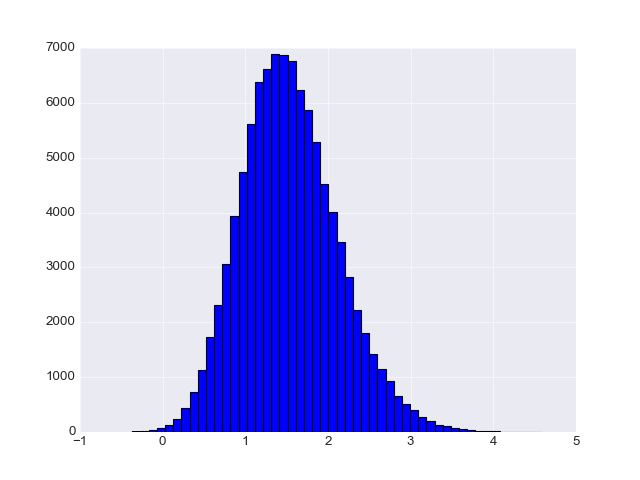

In [16]:
plt.figure()
plt.hist(measurements, bins=50);

Let's compute some moments of this distribution:

In [19]:
import pandas as pd
s = pd.Series(measurements)
s.describe()

count    100000.000000
mean          1.537657
std           0.586054
min          -0.366202
25%           1.128956
50%           1.497776
75%           1.903626
max           4.574300
dtype: float64

So the mean of this distribution is 1.54. What about its variance?

In [23]:
s.var()

0.34345934830558411

We see that the tail is longer on the right than on the left. Let' see if this is supported by the skew value:

In [22]:
s.skew()

0.40657188646921982

How about its kurtosis?

In [25]:
s.kurtosis()

0.31156046900327139

The `kurtosis` function implemented by pandas returns a kurtosis equal to 0 in the case of the normal distribution. So her we can interpret this number as Wikipedia suggests:

> It is also common practice to use an adjusted version of Pearson's kurtosis, the excess kurtosis, which is the kurtosis minus 3, to provide the comparison to the normal distribution. Distributions with kurtosis greater than 3 are said to be leptokurtic. An example of a leptokurtic distribution is the Laplace distribution, which has tails that asymptotically approach zero more slowly than a Gaussian, and therefore produces more outliers than the normal distribution. 

Finally, it's also a good idea to look at the cumulative distribution function instead of the histogram for this sort of visual analysis. To see the non-symmetric behaviour we can also plot a line that passes trough the center, where the most frequent values are found:

<IPython.core.display.Javascript object>


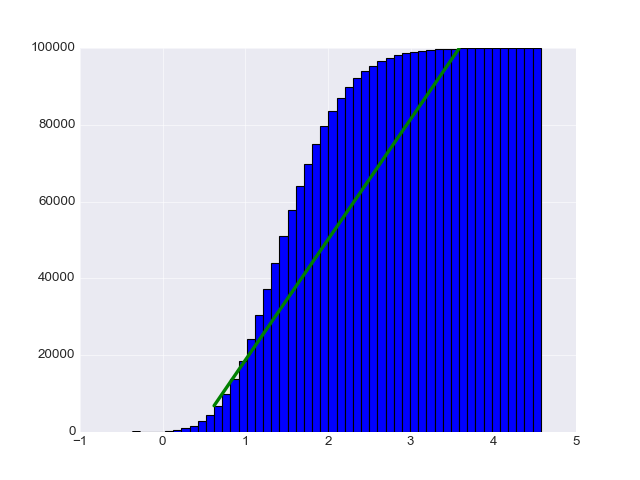

In [38]:
plt.figure()
cumulative = plt.hist(measurements, bins=50, cumulative=True)
plt.plot(cumulative[1][[10, 40]], cumulative[0][[10, 40]], lw=3)

This definitively looks skewed!